<a href="https://colab.research.google.com/github/saminyc/Subway_Data_Analysis/blob/main/Subway_Incidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subway Incident Analysis
*   Data Source: [MTA Subway Major Incidents: Beginning 2020 - Janurary 2025
](https://data.ny.gov/Transportation/MTA-Subway-Major-Incidents-Beginning-2020/j6d2-s8m2/about_data)
*   Data Overview: https://data.ny.gov/api/views/j6d2-s8m2/files/4a8a54a1-49cd-41a7-abc0-d337c7dbba2c?download=true&filename=MTA_SubwayMajorIncidents_Overview.pdf

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## File reading

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Projects/Subway_Incidents_Analysis/MTA_Subway_Major_Incidents__Beginning_2020_20250207.csv')
df.head()

,month,division,line,day_type,category,count
0,2024-12-01,A DIVISION,1,1,Other,1
1,2024-12-01,A DIVISION,1,1,Persons on Trackbed/Police/Medical,1
2,2024-12-01,A DIVISION,1,1,Signals,2
3,2024-12-01,A DIVISION,2,1,Subway Car,1
4,2024-12-01,A DIVISION,2,1,Signals,3


## Data cleaning

In [8]:
df['division'].unique()

array(['A DIVISION', 'B DIVISION', nan], dtype=object)

In [9]:
df['line'].unique()

array(['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'JZ', 'L', 'M', 'N', 'Q', 'R', 'S Fkln', nan, 'S 42nd',
       'S Rock'], dtype=object)

In [10]:
df['category'].unique()

array(['Other', 'Persons on Trackbed/Police/Medical', 'Signals',
       'Subway Car', 'Track', 'Stations and Structure'], dtype=object)

In [11]:
df['count'].unique()

array([1, 2, 3, 7, 6, 5, 4])

### Changing non-null values

In [12]:
df['division'] = df['division'].fillna('Unlabeled')

In [13]:
df['division'].unique()

array(['A DIVISION', 'B DIVISION', 'Unlabeled'], dtype=object)

In [14]:
df['line'] = df['line'].fillna('Unlabeled')

In [15]:
df['line'].unique()

array(['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'JZ', 'L', 'M', 'N', 'Q', 'R', 'S Fkln', 'Unlabeled',
       'S 42nd', 'S Rock'], dtype=object)

### Changing values from binary

In [16]:
df['day_type'].unique()

array([1, 2])

In [17]:
# if 1 change to 'weekday'
# if 2 change it to 'weekend'
df['day_type'] = df['day_type'].apply(lambda x: 'weekday' if x==1 else 'weekend')

In [18]:
df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

### Renaming columns

In [19]:
df = df.rename(columns={'day_type': 'weekday/weekend'})
df

,month,division,line,weekday/weekend,category,count
0,2024-12-01,A DIVISION,1,weekday,Other,1
1,2024-12-01,A DIVISION,1,weekday,Persons on Trackbed/Police/Medical,1
2,2024-12-01,A DIVISION,1,weekday,Signals,2
3,2024-12-01,A DIVISION,2,weekday,Subway Car,1
4,2024-12-01,A DIVISION,2,weekday,Signals,3
...,...,...,...,...,...,...
2013,2020-01-01,B DIVISION,N,weekday,Subway Car,1
2014,2020-01-01,B DIVISION,N,weekday,Track,1
2015,2020-01-01,B DIVISION,R,weekday,Track,1
2016,2020-01-01,B DIVISION,R,weekday,Signals,2


In [20]:
df = df.rename(columns={'day_type': 'weekday/weekend'})
df = df.rename(columns={'month': 'date'})

## Analysis

### Major incidents occurring per month

In [21]:
df.date.unique()

array(['2024-12-01', '2024-11-01', '2024-10-01', '2024-09-01',
       '2024-08-01', '2024-07-01', '2024-06-01', '2024-05-01',
       '2024-04-01', '2024-03-01', '2024-02-01', '2024-01-01',
       '2023-12-01', '2023-11-01', '2023-10-01', '2023-09-01',
       '2023-08-01', '2023-07-01', '2023-06-01', '2023-05-01',
       '2023-04-01', '2023-03-01', '2023-02-01', '2023-01-01',
       '2022-12-01', '2022-11-01', '2022-10-01', '2022-09-01',
       '2022-08-01', '2022-07-01', '2022-06-01', '2022-05-01',
       '2022-04-01', '2022-03-01', '2022-02-01', '2022-01-01',
       '2021-12-01', '2021-11-01', '2021-10-01', '2021-09-01',
       '2021-08-01', '2021-07-01', '2021-06-01', '2021-05-01',
       '2021-04-01', '2021-03-01', '2021-02-01', '2021-01-01',
       '2020-12-01', '2020-11-01', '2020-10-01', '2020-09-01',
       '2020-08-01', '2020-07-01', '2020-06-01', '2020-05-01',
       '2020-04-01', '2020-03-01', '2020-02-01', '2020-01-01'],
      dtype=object)

In [22]:
df['month'] = pd.to_datetime(df['date']).dt.month.astype(str).str.zfill(2)
df.head()

,date,division,line,weekday/weekend,category,count,month
0,2024-12-01,A DIVISION,1,weekday,Other,1,12
1,2024-12-01,A DIVISION,1,weekday,Persons on Trackbed/Police/Medical,1,12
2,2024-12-01,A DIVISION,1,weekday,Signals,2,12
3,2024-12-01,A DIVISION,2,weekday,Subway Car,1,12
4,2024-12-01,A DIVISION,2,weekday,Signals,3,12


In [23]:
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

,date,division,line,weekday/weekend,category,count,month,year
0,2024-12-01,A DIVISION,1,weekday,Other,1,12,2024
1,2024-12-01,A DIVISION,1,weekday,Persons on Trackbed/Police/Medical,1,12,2024
2,2024-12-01,A DIVISION,1,weekday,Signals,2,12,2024
3,2024-12-01,A DIVISION,2,weekday,Subway Car,1,12,2024
4,2024-12-01,A DIVISION,2,weekday,Signals,3,12,2024


In [24]:
monthly_counts = df.groupby('month')['count'].sum().reset_index()
monthly_counts

,month,count
0,01,228
1,02,226
2,03,219
3,04,197
4,05,198
5,06,208
6,07,244
7,08,207
8,09,220
9,10,198


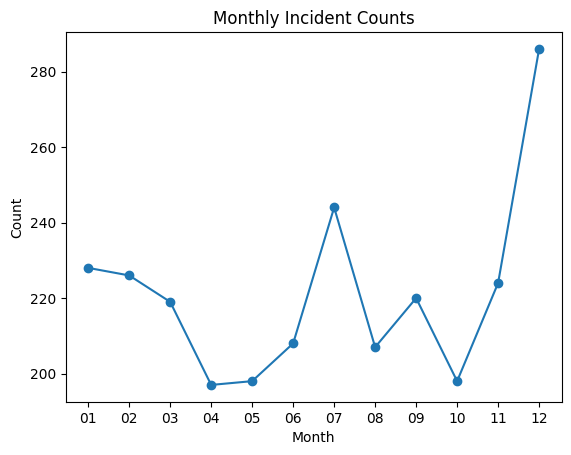

In [25]:
plt.plot(monthly_counts['month'], monthly_counts['count'], marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Incident Counts')
plt.show()

### Division based incident analysis

In [26]:
division_count = df.groupby('division')['count'].sum().reset_index()
division_count

,division,count
0,A DIVISION,1182
1,B DIVISION,1469
2,Unlabeled,4


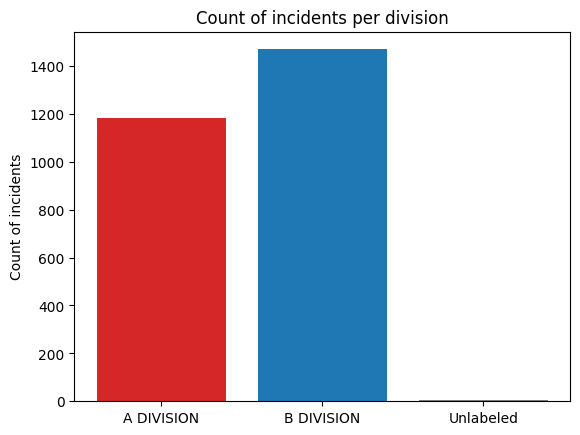

In [27]:
fig, ax = plt.subplots()
bar_labels = ['A Division', 'B Division','Unlabeled']
bar_colors = ['tab:red', 'tab:blue', 'tab:grey']
ax.bar( division_count['division'],division_count['count'], label=bar_labels, color=bar_colors)

ax.set_ylabel('Count of incidents')
ax.set_title('Count of incidents per division')

plt.show()

### Subway lines experiencing the highest number of major incidents

In [28]:
df_count_sorted_desc = df.groupby(['line'])['count'].sum()
# Sorting values from highest to lowest
df_count_sorted_desc = df_count_sorted_desc.sort_values(ascending=False)
df_count_sorted_desc

,count
line,
6,218
N,217
2,196
E,193
F,183
7,178
4,172
5,147
R,139


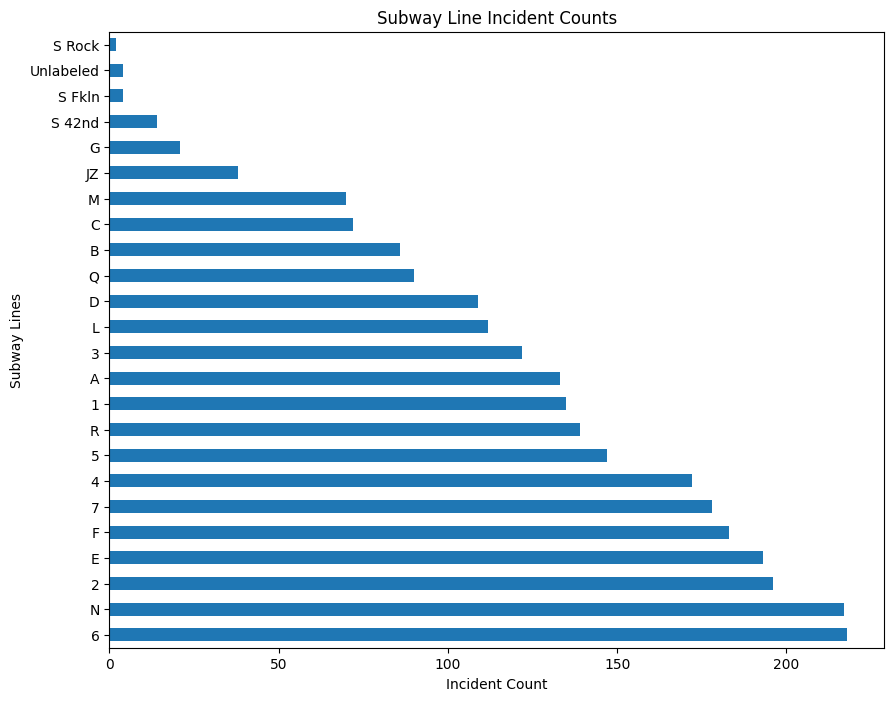

In [29]:
df_count_sorted_desc.plot(kind='barh', figsize=(10, 8))
plt.title('Subway Line Incident Counts')
plt.xlabel('Incident Count')
plt.ylabel('Subway Lines')
plt.show()

In [30]:
df_count_sorted_desc.head(1)

,count
line,
6,218


### Subway lines prone to specific types of incidents

In [31]:
df_category_accident_count = df.loc[df.groupby('line')['count'].idxmax(), ['line', 'category', 'count']].reset_index(drop=True)
df_category_accident_count

,line,category,count
0,1,Persons on Trackbed/Police/Medical,4
1,2,Persons on Trackbed/Police/Medical,5
2,3,Persons on Trackbed/Police/Medical,5
3,4,Persons on Trackbed/Police/Medical,4
4,5,Persons on Trackbed/Police/Medical,4
5,6,Persons on Trackbed/Police/Medical,5
6,7,Track,3
7,A,Signals,4
8,B,Persons on Trackbed/Police/Medical,3
9,C,Signals,2


### Incidents on weekdays vs weekends

In [32]:
df=df.rename(columns={'weekday/weekend': 'day_of_week'})
df.head()

,date,division,line,day_of_week,category,count,month,year
0,2024-12-01,A DIVISION,1,weekday,Other,1,12,2024
1,2024-12-01,A DIVISION,1,weekday,Persons on Trackbed/Police/Medical,1,12,2024
2,2024-12-01,A DIVISION,1,weekday,Signals,2,12,2024
3,2024-12-01,A DIVISION,2,weekday,Subway Car,1,12,2024
4,2024-12-01,A DIVISION,2,weekday,Signals,3,12,2024


In [33]:
df_weekday_weekend = df.groupby(['day_of_week'])['count'].sum().reset_index()
df_weekday_weekend

,day_of_week,count
0,weekday,2372
1,weekend,283


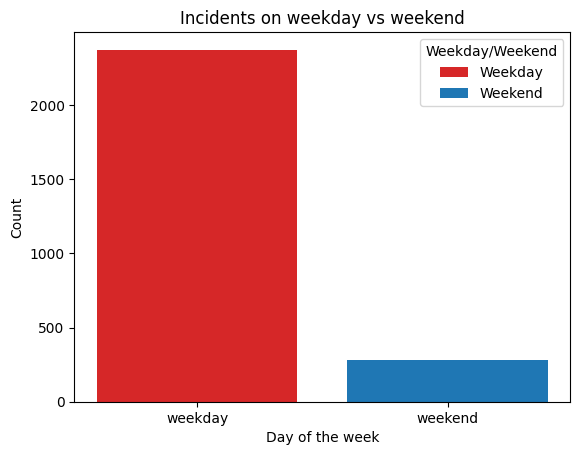

In [34]:
fig, ax = plt.subplots()
bar_labels=['Weekday','Weekend']
bar_colors=['tab:red','tab:blue']
ax.bar(df_weekday_weekend['day_of_week'], df_weekday_weekend['count'], label=bar_labels, color=bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Day of the week')
ax.set_title('Incidents on weekday vs weekend')
ax.legend(title='Weekday/Weekend')

plt.show()

### Incident Categories

In [35]:
df_category_count = df.groupby(['category'])['count'].sum().reset_index()
df_category_count = df_category_count.sort_values(ascending=False, by='count')
df_category_count

,category,count
1,Persons on Trackbed/Police/Medical,843
2,Signals,733
5,Track,413
4,Subway Car,257
0,Other,219
3,Stations and Structure,190


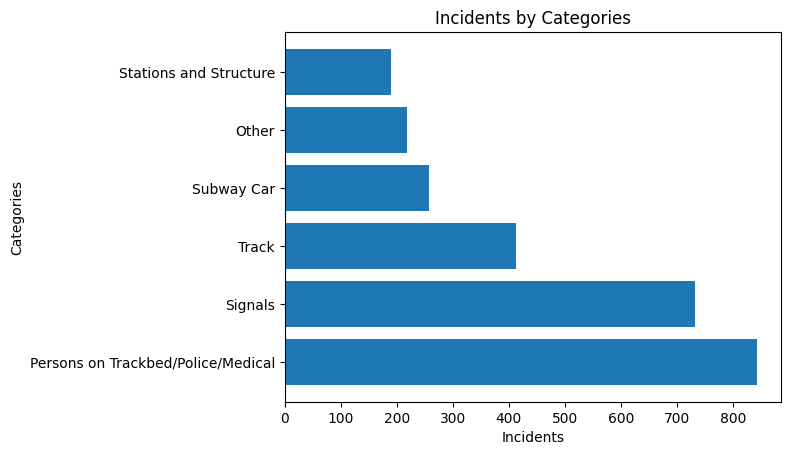

In [36]:
plt.barh(df_category_count['category'], df_category_count['count'])
plt.xlabel('Incidents')
plt.ylabel('Categories')
plt.title('Incidents by Categories')

plt.show()

### Subway incidents over the years

In [37]:
df['year'].unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int32)

In [38]:
df_over_years = df.groupby(['year'])['count'].sum().reset_index()
df_over_years

,year,count
0,2020,322
1,2021,463
2,2022,553
3,2023,534
4,2024,783


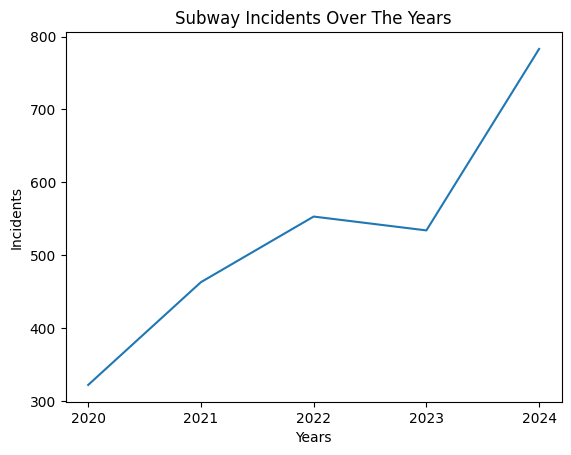

In [39]:
plt.plot(df_over_years['year'], df_over_years['count'])
plt.xticks(df_over_years['year'])
plt.xlabel('Years')
plt.ylabel('Incidents')
plt.title('Subway Incidents Over The Years')
plt.show()